# DA5401 A3: Addressing Class Imbalance with Clustering and Resampling

By Muhammad Ruhaib, BE22B005

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_recall_fscore_support, roc_auc_score,
                             roc_curve, precision_recall_curve, auc)

RANDOM_STATE = 42
DATA_PATH = "creditcard.csv"

# Part A: Data Exploration and Baseline Model

### A.1: Load and Analyze the Dataset

In [ ]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())
display(df.describe().T)

Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We see that the dataset consists of 29 features (V1-V28 and Amount), excluding Time as the PCA-transformed features (V1-V28) already capture this info.

### A.2: Analyze Class Distribution

                count    percent
Non-Fraud (0)  284315  99.827251
Fraud (1)         492   0.172749


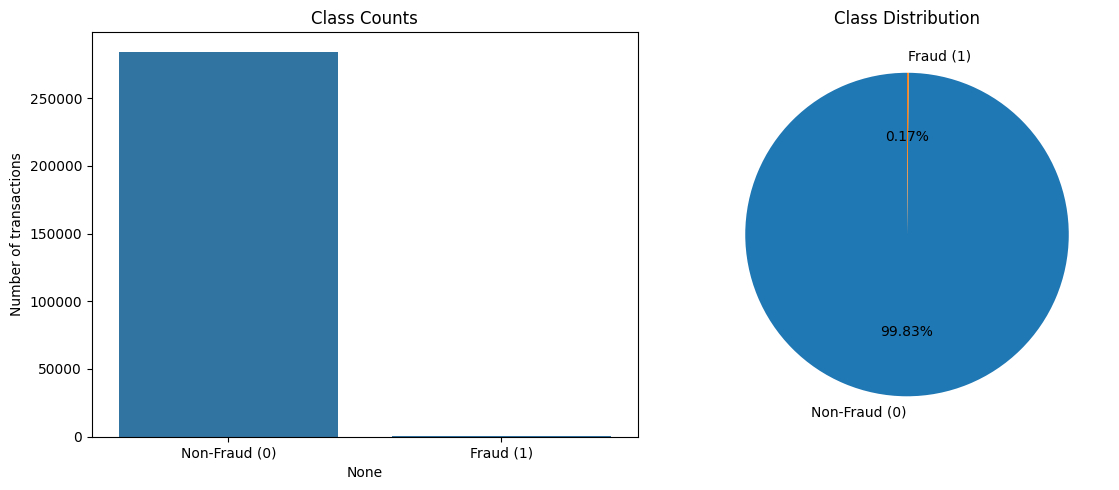

In [ ]:
counts = df['Class'].value_counts().sort_index()
pct = df['Class'].value_counts(normalize=True).sort_index() * 100
class_df = pd.DataFrame({'count': counts, 'percent': pct})
class_df.index = ['Non-Fraud (0)', 'Fraud (1)']
print(class_df)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=class_df.index, y='count', data=class_df)
plt.title("Class Counts")
plt.ylabel("Number of transactions")
plt.subplot(1,2,2)
plt.pie(class_df['count'], labels=class_df.index, autopct='%1.2f%%', startangle=90)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

As seen above, the dataset is highly imbalanced with fraudulent transactions forming a very small fraction of only 0.17%!

### A.3: Baseline Model

In [ ]:
X = df.drop(["Class", "Time"], axis=1)
y = df['Class'].values

print("Features:", X.shape)
print("Label distribution:", pd.Series(y).value_counts().to_dict())

Features: (284807, 29)
Label distribution: {0: 284315, 1: 492}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE) #I've used stratify=y so that the test set retains the original class imbalance.

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class counts:\n", pd.Series(y_train).value_counts())
print("Test class counts:\n", pd.Series(y_test).value_counts())

Train shape: (199364, 29) Test shape: (85443, 29)
Train class counts:
 0    199020
1       344
Name: count, dtype: int64
Test class counts:
 0    85295
1      148
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
baseline_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
baseline_clf.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_clf.predict(X_test_scaled)
y_prob_baseline = baseline_clf.predict_proba(X_test_scaled)[:,1]

print("Classification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline, digits=4))

cm = confusion_matrix(y_test, y_pred_baseline)
print("Confusion Matrix:\n", cm)

Classification Report (Baseline):
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
   macro avg     0.9289    0.8073    0.8581     85443
weighted avg     0.9991    0.9992    0.9991     85443

Confusion Matrix:
 [[85280    15]
 [   57    91]]


We get a near-perfect accuracy of 0.9991, however this is a misleading metric. In highly imbalanced datasets like this, a classifier that predicts every instance as the majority class can achieve very high accuracy but will have 0 recall on the minority class (in our case, fraud), which is the class we care about. Therefore, metrics like precision, recall & f1-score for the minority class are much more informative than overall accuracy.

# Part B: Resampling Approaches
Here, we will create three alternative training sets from the training data only. I've created the below helper functions for conveniently evaluating the models trained on each of these sets.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def minority_metrics(y_true, y_pred):
    # metrics for class 1 (fraud)
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, labels=[1], zero_division=0)
    return {'precision': float(p[0]), 'recall': float(r[0]), 'f1': float(f[0])}

def evaluate_and_print(name, model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    m = minority_metrics(y_test, y_pred)
    print(f"{name}")
    print(f"Precision (fraud): {m['precision']:.4f}")
    print(f"Recall (fraud):    {m['recall']:.4f}")
    print(f"F1 (fraud):        {m['f1']:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    return m

## Part B.1: Naive Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

print("Original train class counts:", pd.Series(y_train).value_counts())

sm = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print("After SMOTE train class counts:", pd.Series(y_train_smote).value_counts())

smote_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
smote_clf.fit(X_train_smote, y_train_smote)

m_smote = evaluate_and_print("Model 2 - SMOTE", smote_clf, X_test_scaled, y_test)

Original train class counts: 0    199020
1       344
Name: count, dtype: int64
After SMOTE train class counts: 0    199020
1    199020
Name: count, dtype: int64
Model 2 - SMOTE
Precision (fraud): 0.0616
Recall (fraud):    0.8851
F1 (fraud):        0.1152
              precision    recall  f1-score   support

           0     0.9998    0.9766    0.9881     85295
           1     0.0616    0.8851    0.1152       148

    accuracy                         0.9765     85443
   macro avg     0.5307    0.9309    0.5516     85443
weighted avg     0.9982    0.9765    0.9866     85443



SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic minority class samples by interpolating between existing minority samples and their nearest neighbors. This helps reduce overfitting that can occur with naive random oversampling.

A couple of potential limitations of SMOTE are:
- It can create synthetic samples in regions where the minority class is not well-defined, possibly creating noisy samples that overlap with the majority class.
- If minority instances are isolated or if there is heavy class overlap, it may generate ambiguous samples.

## Part B.2: Clustering-Based Oversampling (CBO)
The main idea behind using clustering for oversampling is to cluster the minority-class training instances into subgroups and generate synthetic samples within each cluster, which ensures subgroups of the minority class are represented proportionally, hence reducing the chance of creating synthetic points in empty regions.

In [ ]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)

X_minority = X_train_scaled[y_train == 1]
y_minority = y_train[y_train == 1]
print("Minority train shape:", X_minority.shape)

Minority train shape: (344, 29)


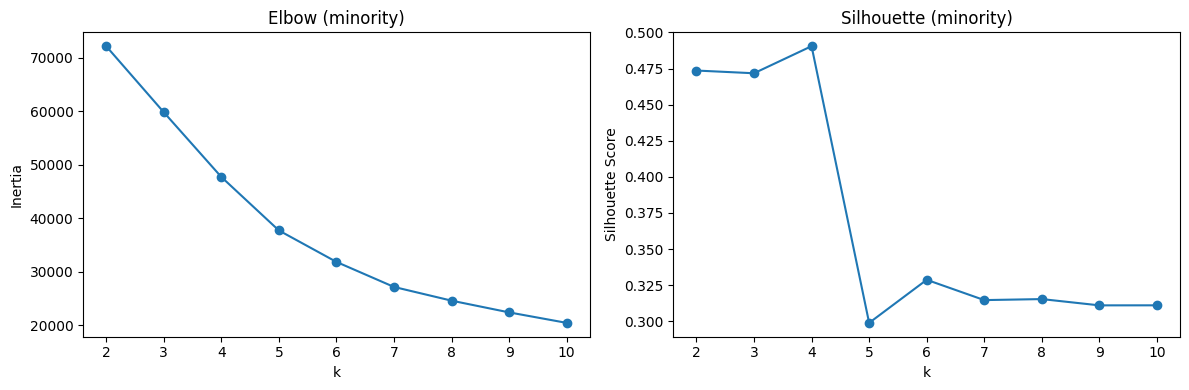

Selected k (minority) by silhouette: 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = {}
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = km.fit_predict(X_minority)
    inertias.append(km.inertia_)
    sil_scores[k] = silhouette_score(X_minority, labels)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertias, '-o')
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow (minority)")
plt.subplot(1,2,2)
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), '-o')
plt.xlabel("k"); plt.ylabel("Silhouette Score"); plt.title("Silhouette (minority)")
plt.tight_layout()
plt.show()

#I choose the best k as the one maximizing silhouette score:
best_k = max(sil_scores, key=sil_scores.get)
print("Selected k (minority) by silhouette:", best_k)

In [ ]:
k = best_k
km_min = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=20)
cluster_labels = km_min.fit_predict(X_minority)
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("Cluster sizes (minority):")
print(cluster_sizes)

Cluster sizes (minority):
0     97
1    237
2      6
3      4
Name: count, dtype: int64


In [ ]:
def synthesize_within_cluster(X_cluster, n_samples_needed, random_state=RANDOM_STATE):
    """
    Create n_samples_needed synthetic samples by interpolating between random pairs
    of points within X_cluster (SMOTE-like). If cluster size is 1, create noisy duplicates.
    """
    np.random.seed(random_state)
    X_cluster = np.asarray(X_cluster)
    n = X_cluster.shape[0]
    if n == 0 or n_samples_needed <= 0:
        return np.empty((0, X_cluster.shape[1]))
    synth = []
    if n == 1:
        std = np.std(X_cluster, axis=0, ddof=1)
        std[std == 0] = 1e-6
        for _ in range(n_samples_needed):
            noise = np.random.normal(scale=1e-3 * std)
            synth.append(X_cluster[0] + noise)
        return np.array(synth)
    else:
        for _ in range(n_samples_needed):
            i, j = np.random.choice(n, 2, replace=False)
            alpha = np.random.rand()
            new = X_cluster[i] + alpha * (X_cluster[j] - X_cluster[i])
            synth.append(new)
        return np.array(synth)

In [ ]:
n_majority = np.sum(y_train == 0)
n_minority = np.sum(y_train == 1)
print("n_majority:", n_majority, "n_minority:", n_minority)

target_minority_total = n_majority
n_to_generate_total = target_minority_total - n_minority
print("Need to generate (minority) total:", n_to_generate_total)

cluster_counts = cluster_sizes.to_dict()
total_min = sum(cluster_counts.values())
synth_samples = []
generated_per_cluster = {}

for clust_id, size in cluster_counts.items():
    proportion = size / total_min
    n_gen = int(round(n_to_generate_total * proportion))
    idxs = np.where(cluster_labels == clust_id)[0]
    X_cluster = X_minority[idxs]
    syn = synthesize_within_cluster(X_cluster, n_gen, random_state=RANDOM_STATE + clust_id)
    synth_samples.append(syn)
    generated_per_cluster[clust_id] = syn.shape[0]

if synth_samples:
    X_synth = np.vstack([s for s in synth_samples if s.size != 0])
else:
    X_synth = np.empty((0, X_minority.shape[1]))

print("Total synthetic generated (CBO):", X_synth.shape[0])

#final CBO training set: original minority + synthetics + all majority (unchanged)
X_minority_original = X_minority
y_minority_original = np.ones(X_minority_original.shape[0], dtype=int)
y_synth = np.ones(X_synth.shape[0], dtype=int)

X_majority = X_train_scaled[y_train == 0]
y_majority = np.zeros(X_majority.shape[0], dtype=int)

X_train_cbo = np.vstack([X_majority, X_minority_original, X_synth])
y_train_cbo = np.concatenate([y_majority, y_minority_original, y_synth])

print("CBO train shape:", X_train_cbo.shape, "class counts:", pd.Series(y_train_cbo).value_counts().to_dict())

n_majority: 199020 n_minority: 344
Need to generate (minority) total: 198676
Total synthetic generated (CBO): 198676
CBO train shape: (398040, 29) class counts: {0: 199020, 1: 199020}


In [ ]:
cbo_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
cbo_clf.fit(X_train_cbo, y_train_cbo)

m_cbo = evaluate_and_print("Model 3 - CBO", cbo_clf, X_test_scaled, y_test)

Model 3 - CBO
Precision (fraud): 0.1427
Recall (fraud):    0.8514
F1 (fraud):        0.2444
              precision    recall  f1-score   support

           0     0.9997    0.9911    0.9954     85295
           1     0.1427    0.8514    0.2444       148

    accuracy                         0.9909     85443
   macro avg     0.5712    0.9212    0.6199     85443
weighted avg     0.9983    0.9909    0.9941     85443



## Part B.3: Clustering-Based Undersampling (CBU)
Here, the main idea is to cluster the majority class training instances, then undersample from clusters to create a representative, smaller majority sample while keeping all minority instances.
This preserves sub-group structure of the majority class and avoids random deletion that may remove important subgroups.

Majority subset shape: (199020, 29)


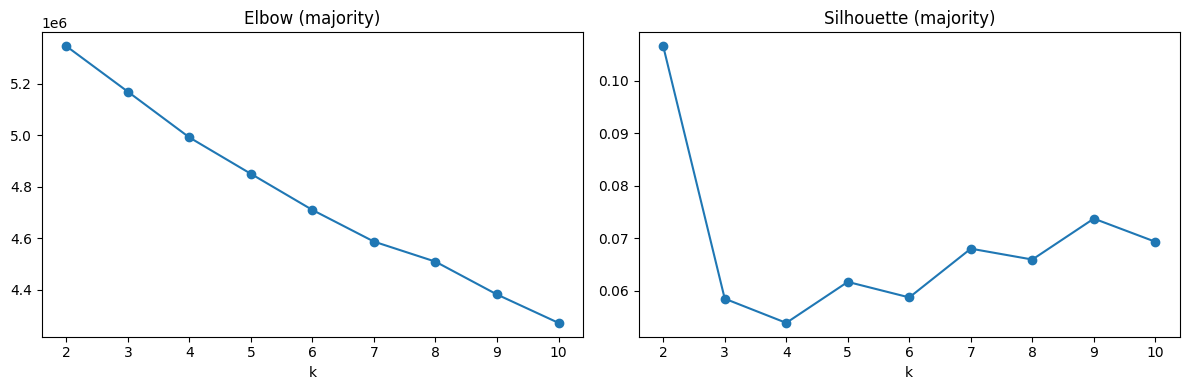

Selected k (majority): 2


In [ ]:
X_majority_train = X_train_scaled[y_train == 0]
print("Majority subset shape:", X_majority_train.shape)

inertias_maj = []
sil_scores_maj = {}
K_range_maj = range(2, 11)

for k in K_range_maj:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels_maj = km.fit_predict(X_majority_train)
    inertias_maj.append(km.inertia_)
    sil_scores_maj[k] = silhouette_score(X_majority_train, labels_maj)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range_maj), inertias_maj, '-o'); plt.title("Elbow (majority)"); plt.xlabel("k")
plt.subplot(1,2,2)
plt.plot(list(sil_scores_maj.keys()), list(sil_scores_maj.values()), '-o'); plt.title("Silhouette (majority)"); plt.xlabel("k")
plt.tight_layout(); plt.show()

best_k_maj = max(sil_scores_maj, key=sil_scores_maj.get)
print("Selected k (majority):", best_k_maj)

In [ ]:
km_maj = KMeans(n_clusters=best_k_maj, random_state=RANDOM_STATE, n_init=20)
labels_maj = km_maj.fit_predict(X_majority_train)
maj_cluster_sizes = pd.Series(labels_maj).value_counts().sort_index()
print("Majority cluster sizes:\n", maj_cluster_sizes)

Majority cluster sizes:
 0    170035
1     28985
Name: count, dtype: int64


In [ ]:
target_majority_total = n_minority
orig_majority_total = X_majority_train.shape[0]
print("orig_majority_total:", orig_majority_total, "target_majority_total:", target_majority_total)

cluster_ids = np.arange(best_k_maj)
cluster_counts_maj = maj_cluster_sizes.to_dict()

sampled_indices = []
for clust_id, size in cluster_counts_maj.items():
    retain = int(round(size * (target_majority_total / orig_majority_total)))
    retain = max(0, min(retain, size))
    idxs = np.where(labels_maj == clust_id)[0]
    chosen = np.random.choice(idxs, size=retain, replace=False) if retain > 0 else np.array([], dtype=int)
    sampled_indices.extend(chosen.tolist())

len_sampled = len(sampled_indices)
print("Final sampled majority count:", len_sampled)

#final CBU training set: sampled majority + all minority
X_majority_sampled = X_majority_train[sampled_indices]
y_majority_sampled = np.zeros(X_majority_sampled.shape[0], dtype=int)

X_minority_train = X_minority
y_minority_train = np.ones(X_minority_train.shape[0], dtype=int)

X_train_cbu = np.vstack([X_majority_sampled, X_minority_train])
y_train_cbu = np.concatenate([y_majority_sampled, y_minority_train])

print("CBU train shape:", X_train_cbu.shape, "class counts:", pd.Series(y_train_cbu).value_counts().to_dict())

orig_majority_total: 199020 target_majority_total: 344
Final sampled majority count: 344
CBU train shape: (688, 29) class counts: {0: 344, 1: 344}


In [ ]:
cbu_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
cbu_clf.fit(X_train_cbu, y_train_cbu)

m_cbu = evaluate_and_print("Model 4 - CBU", cbu_clf, X_test_scaled, y_test)

Model 4 - CBU
Precision (fraud): 0.0535
Recall (fraud):    0.8784
F1 (fraud):        0.1009
              precision    recall  f1-score   support

           0     0.9998    0.9730    0.9862     85295
           1     0.0535    0.8784    0.1009       148

    accuracy                         0.9729     85443
   macro avg     0.5267    0.9257    0.5436     85443
weighted avg     0.9981    0.9729    0.9847     85443



# Part C: Model Comparison and Analysis
We now summarize Precision, Recall, and F1 for the minority (fraud) class across:
- Model 1: Baseline (imbalanced)
- Model 2: SMOTE
- Model 3: CBO (clustering-based oversampling)
- Model 4: CBU (clustering-based undersampling)

,precision,recall,f1
model,,,
Baseline (imbalanced),0.858491,0.614865,0.716535
SMOTE,0.061618,0.885135,0.115215
CBO,0.142695,0.851351,0.244423
CBU,0.053520,0.878378,0.100893


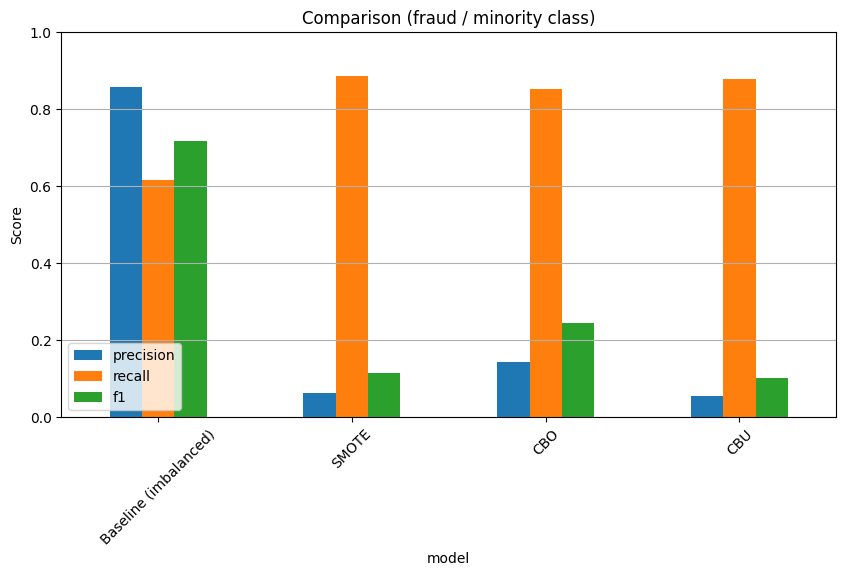

In [ ]:
results = []

m_baseline = minority_metrics(y_test, y_pred_baseline)
results.append({'model': 'Baseline (imbalanced)', **m_baseline})
results.append({'model': 'SMOTE', **m_smote})
results.append({'model': 'CBO', **m_cbo})
results.append({'model': 'CBU', **m_cbu})

results_df = pd.DataFrame(results)
results_df = results_df.set_index('model')
display(results_df)

results_df.plot(kind='bar', figsize=(10,5))
plt.title("Comparison (fraud / minority class)")
plt.ylabel("Score")
plt.ylim(0,1.0)
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.grid(axis='y')
plt.show()

## Part C.3: Conclusion and Recommendations

**Conclusions:**

Baseline (Imbalanced):
The baseline model achieved reasonably high precision (0.86) but suffered from low recall (0.61). This means it detects only a portion of fraud cases but is more reliable when it does flag fraud. The drawback is that many fraudulent transactions remain undetected.

SMOTE (Naive Oversampling):
SMOTE greatly improved recall (0.89) but at the cost of extremely poor precision (0.06). This indicates the model identifies almost all fraud cases, but with many false alarms. The drawback is that synthetic points may not capture the real distribution, leading to noisy boundaries.

Clustering-Based Oversampling (CBO):
CBO strikes a better balance, with higher recall (0.85) than the baseline while maintaining better precision (0.14) than SMOTE. By oversampling within minority clusters, it preserves diversity and avoids generating synthetic points in sparse areas. The drawback is that precision is still relatively low.

Clustering-Based Undersampling (CBU):
CBU achieved high recall (0.88) but very low precision (0.05). While it reduces class imbalance by compressing the majority class, it can discard important majority patterns, causing overfitting to the minority.

I believe CBO performed the best overall, because it improved recall substantially while keeping precision meaningfully higher than SMOTE and CBU. This makes it a more balanced and realistic option for fraud detection.

**How Clustering Helps Compared to SMOTE:**
Clustering-based methods ensure that resampling respects the natural subgroups in the data. Oversampling within clusters (CBO) prevents noisy synthetic samples in regions with no real minority data. Undersampling within clusters (CBU) ensures the majority is reduced representatively, rather than randomly discarding useful data.

**Recommendation:**
Clustering-Based Oversampling (CBO) should be used as it provides the best trade-off between recall (catching frauds) and precision (avoiding false alarms), while directly addressing the weaknesses of naive oversampling like SMOTE.